<a href="https://colab.research.google.com/github/Codeswastik/MY-PROJECTS/blob/main/Stock_Market_Return_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install tensorflow
!pip install sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-linux_x86_64.whl size=886632 sha256=92740012f02688d68c21c2eb1b9f5cb9ebb21caca7d6a56607c8f207a7ebb283
  Stored in directory: /root/.cache/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import yfinance as yahoo
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from copy import deepcopy

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


code = input()
stock_data = yahoo.Ticker(code)
fb = stock_data.history(period="max").reset_index()
fb.index = pd.to_datetime(fb['Date'])  # Ensure proper datetime index
fb.index = fb.index.tz_localize(None)  # Remove timezone info

scaler = MinMaxScaler()
fb['Close'] = scaler.fit_transform(fb[['Close']])

fb = fb[['Close']]
print(fb.columns)
fb

KeyboardInterrupt: Interrupted by user

Text(0.5, 1.0, 'Frequency Distribution of Stock Prices after normalization of AAPL')

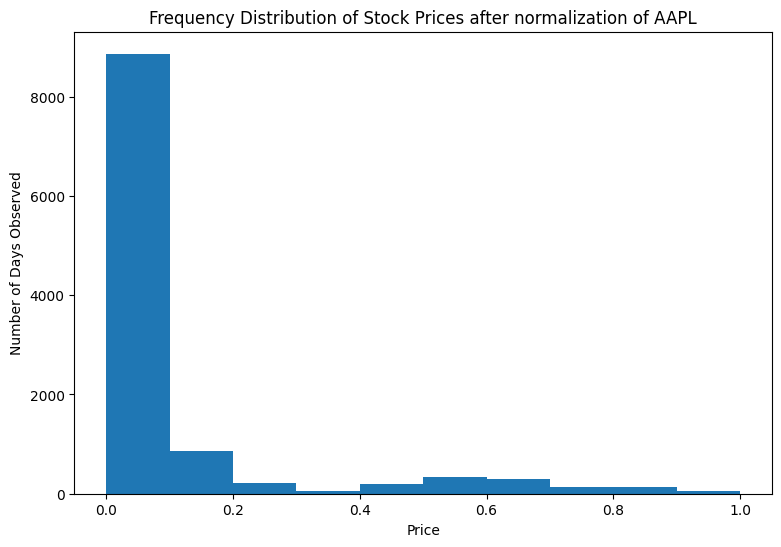

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.hist(fb['Close'], bins=10)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title(f'Frequency Distribution of Stock Prices after normalization of {code}')

In [ ]:
fb.index = fb.index.tz_localize(None)


def fb_to_windowed_fb(dataframe, first_date, last_date, n=3):

  first_date = pd.to_datetime(first_date)
  last_date = pd.to_datetime(last_date)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    fb_subset = dataframe.loc[:target_date].tail(n+1)

    if len(fb_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = fb_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_fb = pd.DataFrame({})
  ret_fb['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_fb[f'Target-{n-i}'] = X[:, i]

  ret_fb['Target'] = Y

  return ret_fb

windowed_fb = fb_to_windowed_fb(fb,
                                fb.index[15],
                                fb.index[-1],
                                n=15)
windowed_fb

,Target Date,Target-15,Target-14,Target-13,Target-12,Target-11,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1981-01-06,0.000236,0.000216,0.000189,0.000197,0.000207,0.000229,0.000247,0.000264,0.000285,0.000325,0.000332,0.000320,0.000307,0.000312,0.000302,0.000282
1,1981-01-07,0.000216,0.000189,0.000197,0.000207,0.000229,0.000247,0.000264,0.000285,0.000325,0.000332,0.000320,0.000307,0.000312,0.000302,0.000282,0.000264
2,1981-01-08,0.000189,0.000197,0.000207,0.000229,0.000247,0.000264,0.000285,0.000325,0.000332,0.000320,0.000307,0.000312,0.000302,0.000282,0.000264,0.000256
3,1981-01-09,0.000197,0.000207,0.000229,0.000247,0.000264,0.000285,0.000325,0.000332,0.000320,0.000307,0.000312,0.000302,0.000282,0.000264,0.000256,0.000277
4,1981-01-12,0.000207,0.000229,0.000247,0.000264,0.000285,0.000325,0.000332,0.000320,0.000307,0.000312,0.000302,0.000282,0.000264,0.000256,0.000277,0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,2025-03-26,0.911111,0.909526,0.923983,0.879181,0.853514,0.838593,0.810375,0.825103,0.827074,0.822010,0.831867,0.827461,0.843580,0.853089,0.864763,0.856182
11147,2025-03-27,0.909526,0.923983,0.879181,0.853514,0.838593,0.810375,0.825103,0.827074,0.822010,0.831867,0.827461,0.843580,0.853089,0.864763,0.856182,0.865150
11148,2025-03-28,0.923983,0.879181,0.853514,0.838593,0.810375,0.825103,0.827074,0.822010,0.831867,0.827461,0.843580,0.853089,0.864763,0.856182,0.865150,0.842150
11149,2025-03-31,0.879181,0.853514,0.838593,0.810375,0.825103,0.827074,0.822010,0.831867,0.827461,0.843580,0.853089,0.864763,0.856182,0.865150,0.842150,0.858501


In [ ]:
def windowed_fb_to_date_X_y(windowed_dataframe):
  fb_as_np = windowed_dataframe.to_numpy()

  dates = fb_as_np[:, 0]

  middle_matrix = fb_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = fb_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_fb_to_date_X_y(windowed_fb)

#dates.shape, X.shape, y.shape

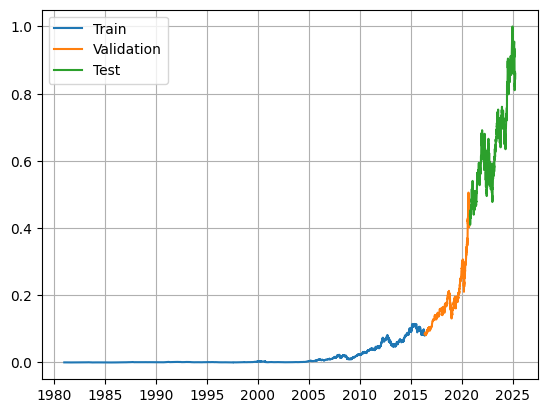

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.grid(True)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
model = Sequential([layers.Input((15, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120)

Epoch 1/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.2395e-04 - mean_absolute_error: 0.0042 - val_loss: 0.0043 - val_mean_absolute_error: 0.0422
Epoch 2/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2384e-06 - mean_absolute_error: 7.6470e-04 - val_loss: 0.0045 - val_mean_absolute_error: 0.0447
Epoch 3/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.1589e-06 - mean_absolute_error: 0.0011 - val_loss: 0.0042 - val_mean_absolute_error: 0.0434
Epoch 4/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4157e-06 - mean_absolute_error: 7.8575e-04 - val_loss: 0.0039 - val_mean_absolute_error: 0.0413
Epoch 5/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6633e-06 - mean_absolute_error: 9.4932e-04 - val_loss: 0.0037 - val_mean_absolute_error: 0.0406
Epoch 6/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2283e-06 - mean_absolute_error: 7.8734e-04 - val_loss: 0.0035 - val_mean_absolute_error: 0.0392
Epoch 7/120
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step -

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


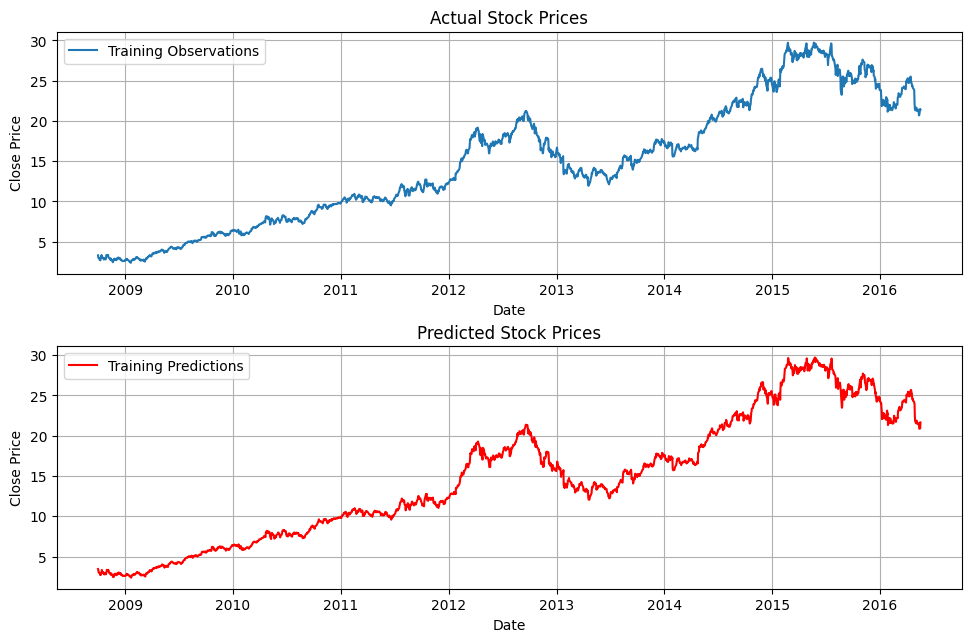

In [ ]:
# STEP 3: Inverse transform predictions and actuals
train_predictions = model.predict(X_train)

train_predictions = scaler.inverse_transform(train_predictions).flatten()

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# STEP 4: Plot predictions vs actuals
plt.figure(figsize=(300, 100))
plt1 = plt.subplot2grid((25, 20), (0, 0))
plt2 = plt.subplot2grid((25, 20), (1, 0))
plt1.plot(dates_train[7000:10000], y_train_actual[7000:10000],label='Training Observations')
plt2.plot(dates_train[7000:10000], train_predictions[7000:10000],label='Training Predictions', color="red")
plt1.legend()
plt2.legend()
plt1.set_title("Actual Stock Prices")
plt2.set_title("Predicted Stock Prices")
plt1.set_xlabel("Date")
plt1.set_ylabel("Close Price")
plt2.set_xlabel("Date")
plt2.set_ylabel("Close Price")
plt1.grid(True)
plt2.grid(True)
plt1 = plt.subplots_adjust(bottom=0.1,wspace=0.3,hspace=0.3)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example actual and predicted values
y_true = np.array(y_train_actual)
y_pred = np.array(train_predictions)

# Calculate MSE, RMSE, MAE, R2
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = 100 * np.mean(abs((y_true - y_pred) / y_true), axis=-1)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MSE: 0.019332943484187126
RMSE: 0.1390429555360038
MAE: 0.05674271285533905
MAPE: 4.8909687995910645
R2 Score: 0.9995837211608887


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


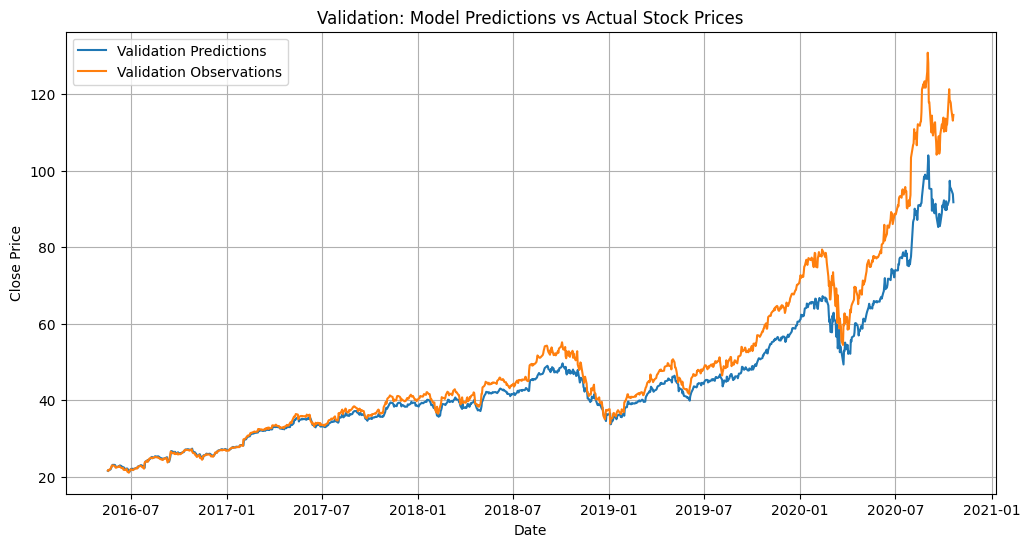

In [ ]:
# STEP 5 (for validation): Inverse transform predictions and targets
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions).flatten()

y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# STEP 6 (for validation): Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val_actual, label='Validation Observations')
plt.legend()
plt.title("Validation: Model Predictions vs Actual Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


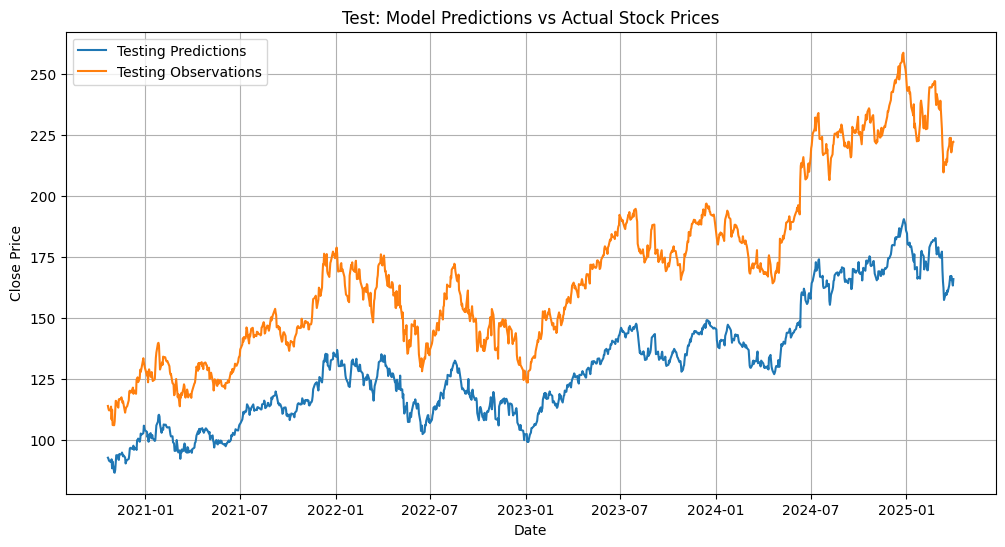

In [ ]:
# STEP 7  (for test): Inverse transform predictions and true values
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions).flatten()

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# STEP 8 (for test): Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(dates_test[:], test_predictions[:], label='Testing Predictions')
plt.plot(dates_test[:], y_test_actual[:], label='Testing Observations')
plt.legend()
plt.title("Test: Model Predictions vs Actual Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


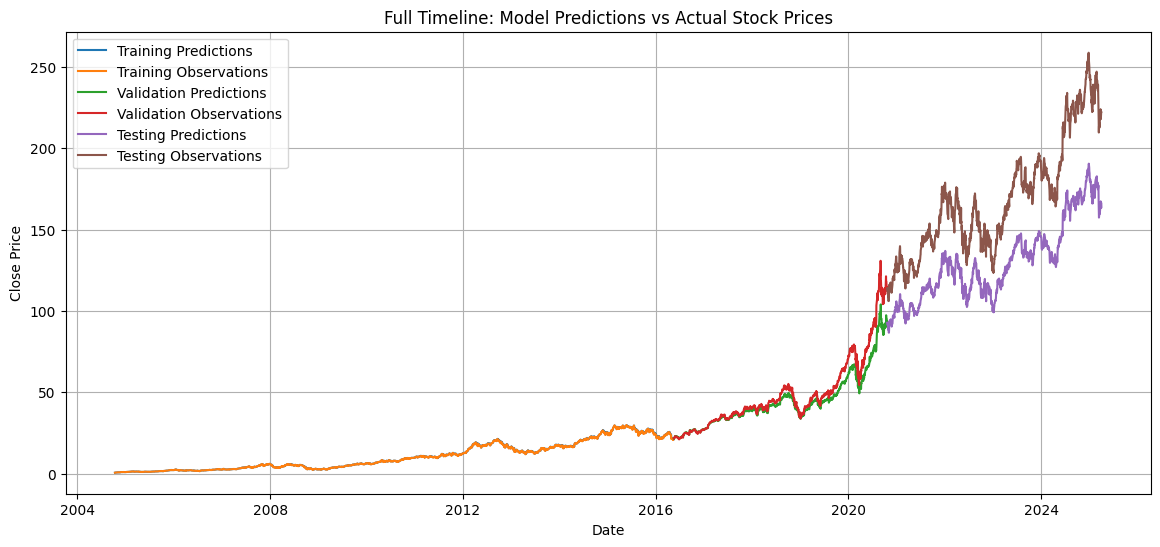

In [ ]:
# Inverse transform all predictions and actuals
train_predictions = scaler.inverse_transform(model.predict(X_train)).flatten()
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

val_predictions = scaler.inverse_transform(model.predict(X_val)).flatten()
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

test_predictions = scaler.inverse_transform(model.predict(X_test)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot everything
plt.figure(figsize=(14, 6))
plt.plot(dates_train[6000:], train_predictions[6000:])
plt.plot(dates_train[6000:], y_train_actual[6000:])
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val_actual)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test_actual)

plt.legend([
    'Training Predictions',
    'Training Observations',
    'Validation Predictions',
    'Validation Observations',
    'Testing Predictions',
    'Testing Observations'
])
plt.title("Full Timeline: Model Predictions vs Actual Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()